In [3]:
import sys
sys.path.append("../src/")
from data_generation import labeled_awgn, generate_labeled_constellations, generate_unlabeled_constellations

# Generate Labeled Data

In [4]:
# Configuration
CONFIG = {
    'samples_per_image': 1024,
    'image_size': (224, 224),
    'image_num': [100], # total number of images to generate: image_num * len(mod_types)
    'mod_types': ['OOK', '4ASK', '8ASK', 'OQPSK', 'CPFSK', 'GFSK', '4PAM', 'DQPSK', '16PAM', 'GMSK'],
    'mode': 'train',
    'SNR_dB': 0.0,
    # 'base_path': './data'
    'base_path': '/mnt/j/My Drive/workspace/vlm/data/'
}

generate_labeled_constellations(**CONFIG)

Generating images for modalities:   0%|          | 0/10 [00:04<?, ?it/s]


KeyboardInterrupt: 

# Generate Unlabeled Data

In [ ]:
# Configuration
CONFIG = {
    'samples_per_image': 1024,
    'image_size': (224, 224),
    'image_num': [100], # total number of images to generate: image_num * len(mod_types)
    'mod_types': ['OOK', '4ASK', '8ASK', 'OQPSK', 'CPFSK', 'GFSK', '4PAM', 'DQPSK', '16PAM', 'GMSK'],
    'set_types': ['noiseLessImg', 'noisyImg', 'noiselessSignal', 'noise', 'noisySignal'],
    # 'set_types': ['noiseLessImg', 'noisyImg'],
    'mode': 'test',
    # 'base_path': './data'
    'base_path': '/mnt/j/My Drive/workspace/vlm/data/'
}

generate_unlabeled_constellations(**CONFIG)

Generating images for modalities: 100%|██████████| 10/10 [07:53<00:00, 47.33s/it]

Processing complete.


# Load Data

In [ ]:
import numpy as np

# Replace 'example.npy' with the path to your npy file
file_path = '../data/unlabeled_10k/test/noisySignal/4ASK_-0.17dB__081_20250127_164342.npy'
data = np.load(file_path)

print("Data shape:", data.shape)

Data shape: (1024,)


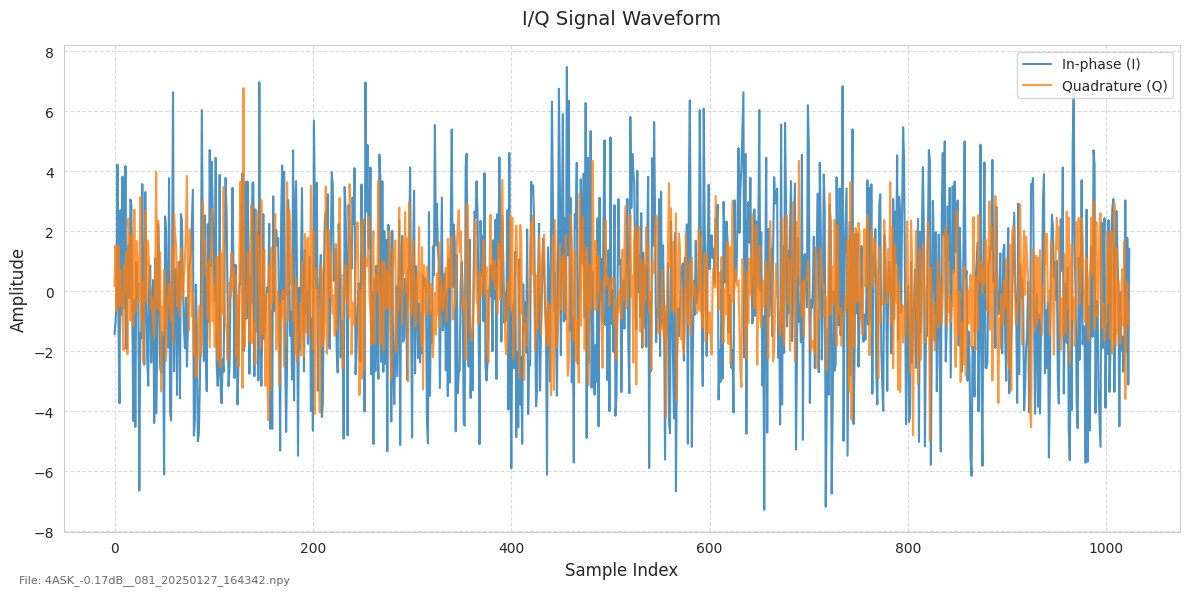

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 6))

# Plot both I and Q
ax.plot(data.real, label='In-phase (I)', alpha=0.8, linewidth=1.5)
ax.plot(data.imag, label='Quadrature (Q)', alpha=0.8, linewidth=1.5)

# Enhance the plot
ax.set_title('I/Q Signal Waveform', fontsize=14, pad=15)
ax.set_xlabel('Sample Index', fontsize=12)
ax.set_ylabel('Amplitude', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(fontsize=10, loc='upper right')

# Add file info as text
file_name = file_path.split('/')[-1]
plt.figtext(0.02, 0.02, f'File: {file_name}', fontsize=8, alpha=0.7)

# Adjust layout and display
plt.tight_layout()
plt.show()

In [ ]:
import json

path = '../src/finetune/openai_responses.json'

with open(path, 'r') as f:
    data = json.load(f)

data[0]['prompt']

'### Instructions:\nYou are an expert quantitative analyst in wireless communication modulation.\nBased on your knowledge in wireless communication modulation and the detailed signal statistics provided below, determine the modulation type.\n1. DO NOT PROVIDE ANY ADDITIONAL INFORMATION OR CONTEXT.\n2. No OTHER TEXT, NO BLABBER.\n3. PROVIDE YOUR REASONING IN <think>. \n### Example: Overall Signal Information: {nobs: 1024, min: -7.28291-0.52755j, max: 7.47761-0.92365j, mean: -0.00901+0.01684j, variance: 5.28436-0.14411j, skewness: 0.01245-0.07525j, kurtosis: -0.57082+0.38327j, moment_1: 0.00000, moment_2: 7.83834, moment_3: 0.14721, moment_4: 152.19991, kstat_1: -0.00901+0.01684j, kstat_2: 5.28436-0.14411j, kstat_3: 0.11393-0.92135j, kstat_4: -15.25524+11.61176j, kstatvar_1: 0.00516-0.00014j, kstatvar_2: 0.03958+0.00835j} ### Answer: 4ASK\n### Example: Overall Signal Information: {nobs: 1024, min: -6.64400+1.86709j, max: 7.47540+1.64160j, mean: -0.10379-0.04884j, variance: 5.27506-0.2079

In [7]:
# Create a list to store all matches
all_matches = []

pattern = r'### Question: Overall Signal Information: (.*?)\n### Response'
# Iterate through all responses
for item in data:
    if 'prompt' in item:
        matches = extract_text(item['prompt'], pattern)
        all_matches.extend(matches)

list(set(all_matches))[:11]

['{nobs: 1024, min: -55.18799-12.29345j, max: 66.50546-21.29749j, mean: 0.12751+0.29329j, variance: 116.75237-9.63274j, skewness: -0.64099+0.05898j, kurtosis: -6.31320-3.45831j, moment_1: 0.00000, moment_2: 376.56743, moment_3: -456.54334, moment_4: 408759.82532, kstat_1: 0.12751+0.29329j, kstat_2: 116.75237-9.63274j, kstat_3: -798.52436+174.56810j, kstat_4: -93626.17741-32792.51556j, kstatvar_1: 0.11402-0.00941j, kstatvar_2: -64.83716-36.35031j}\nthe answer is one of: 4ASK, 4PAM, 8ASK, 16PAM, CPFSK, DQPSK, GFSK, GMSK, OQPSK, OOK',
 '{nobs: 1024, min: -6.89088+0.01165j, max: 6.22548-0.29914j, mean: -0.06665+0.01054j, variance: 5.21783+0.26995j, skewness: 0.08830+0.01060j, kurtosis: -1.27145-0.09141j, moment_1: 0.00000, moment_2: 6.20972, moment_3: 0.79166, moment_4: 82.18673, kstat_1: -0.06665+0.01054j, kstat_2: 5.21783+0.26995j, kstat_3: 1.04315+0.20819j, kstat_4: -34.27414-6.07696j, kstatvar_1: 0.00510+0.00026j, kstatvar_2: 0.01958-0.00043j}\nthe answer is one of: 4ASK, 4PAM, 8ASK, 1

In [8]:
import re
import json
import pandas as pd

def extract_text(response, pattern=r'### Example: Overall Signal Information: (.*?) ### Answer'):
    # pattern = r'### Example: Overall Signal Information: (.*?) ### Answer'
    matches = re.findall(pattern, response, re.DOTALL)
    return matches

def parse_complex(s):
    # Remove spaces and convert to lowercase
    s = s.strip().lower()
    
    # Handle special cases
    if s == '0':
        return 0
    if s == '0.0':
        return 0.0
        
    # Split into real and imaginary parts
    if 'j' in s:
        # Handle the case where the imaginary part is first (e.g., "j*1")
        s = s.replace('j*1', 'j')
        # Convert string to complex number
        try:
            return complex(s)
        except ValueError:
            # If direct conversion fails, try manual parsing
            s = s.replace('j', '')
            parts = s.split('+')
            if len(parts) == 1:
                parts = s.split('-')
                if len(parts) == 2:
                    return complex(-float(parts[1]), 0)
            if len(parts) == 2:
                return complex(float(parts[0]), float(parts[1]))
            return complex(float(s), 0)
    return float(s)

def parse_dict(s):
    # Clean up the string
    s = s.strip('{}').strip()
    
    # Split into key-value pairs
    pairs = s.split(',')
    result = {}
    
    for pair in pairs:
        if ':' in pair:
            key, value = pair.split(':', 1)
            key = key.strip()
            value = value.strip()
            
            # Try to convert to complex/float, fall back to string if fails
            try:
                result[key] = parse_complex(value)
            except (ValueError, TypeError):
                result[key] = value
                
    return result

# Create a list to store all matches
all_matches = []

# Iterate through all responses
for item in data:
    if 'prompt' in item:
        matches = extract_text(item['prompt'])
        all_matches.extend(matches)

pattern = r'### Question: Overall Signal Information: (.*?)\n### Response'
# Iterate through all responses
for item in data:
    if 'prompt' in item:
        matches = extract_text(item['prompt'], pattern)
        all_matches.extend(matches)


# Print unique matches
unique_matches = list(set(all_matches))
# Parse the first dictionary string
dict_obj = parse_dict(unique_matches[0])
dict_list = [parse_dict(match) for match in unique_matches]
df = pd.DataFrame(dict_list)
df.to_excel('output.xlsx', index=False)
df

,nobs,min,max,mean,variance,skewness,kurtosis,moment_1,moment_2,moment_3,moment_4,kstat_1,kstat_2,kstat_3,kstat_4,kstatvar_1,kstatvar_2
0,1024.0,-55.18799-12.29345j,66.50546-21.29749j,0.12751+0.29329j,116.75237- 9.63274j,-0.64099+0.05898j,-6.31320- 3.45831j,0.0,376.56743,-456.54334,408759.82532,0.12751+0.29329j,116.75237- 9.63274j,-798.52436+174.56810j,-93626.17741-32792.51556j,0.11402-0.00941j,-64.83716-36.35031j}\nthe answer is one of: 4ASK
1,1024.0,-6.89088+ 0.01165j,6.22548- 0.29914j,-0.06665+0.01054j,5.21783+ 0.26995j,0.08830+0.01060j,-1.27145- 0.09141j,0.0,6.20972,0.79166,82.18673,-0.06665+0.01054j,5.21783+ 0.26995j,1.04315+ 0.20819j,-34.27414- 6.07696j,0.00510+0.00026j,0.01958-0.00043j}\nthe answer is one of: 4ASK
2,1024.0,-14.35211+ 1.63079j,11.53947+ 2.17098j,-0.25897-0.03150j,5.04075+ 0.24910j,-0.55704+0.13045j,-3.30679- 0.45640j,0.0,13.56812,0.54360,544.99120,-0.25897-0.03150j,5.04075+ 0.24910j,-6.41727+ 1.00909j,-82.92763- 19.95539j,0.00492+0.00024j,-0.03137-0.01455j}\nthe answer is one of: 4ASK
3,1024.0,-18.36821+ 0.76574j,15.55832- 1.95672j,-0.17619-0.00702j,6.54317+ 0.53367j,0.02113-0.00861j,-3.56583+10.57909j,0.0,27.79425,14.51255,2342.11742,-0.17619-0.00702j,6.54317+ 0.53367j,0.37098- 0.10059j,-226.38499+ 427.13126j,0.00639+0.00052j,-0.13767+0.42993j}\nthe answer is one of: 4ASK
4,1024.0,-18.20198+ 0.55664j,17.48955- 1.14401j,0.12601+0.01101j,6.57026+ 3.12154j,0.20965+0.04295j,-4.48330+ 4.09539j,0.0,27.59344,-5.27181,2382.18603,0.12601+0.01101j,6.57026+ 3.12154j,2.71975+ 3.20665j,-319.19981- 47.00277j,0.00642+0.00305j,-0.24589+0.03422j}\nthe answer is one of: 4ASK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,1024.0,-9.73874- 1.09801j,9.94525+ 0.82255j,0.04202-0.10430j,5.39966+ 0.54857j,0.14470-0.16559j,-0.49608+ 0.70384j,0.0,10.68490,1.15879,313.16181,0.04202-0.10430j,5.39966+ 0.54857j,2.12844- 1.79555j,-18.40521+ 17.49057j,0.00527+0.00054j,0.03836+0.02861j}\nthe answer is one of: 4ASK
338,1024.0,-54.31821-18.72766j,54.79071-24.35105j,-0.65245+0.19749j,77.03491+ 2.57300j,-0.01335-0.02225j,-1.24886- 5.76695j,0.0,340.52307,305.87882,326658.20715,-0.65245+0.19749j,77.03491+ 2.57300j,-8.28387- 15.51497j,-5106.96699-34847.76232j,0.07523+0.00251j,6.58881-33.19111j}\nthe answer is one of: 4ASK
339,1024.0,-9.00873- 1.14328j,10.01513+ 0.17884j,-0.08477+0.07648j,4.69263+ 0.33342j,0.20972+0.40549j,-2.89819- 0.01382j,0.0,10.66802,1.06412,307.14321,-0.08477+0.07648j,4.69263+ 0.33342j,1.69095+ 4.34776j,-63.63703- 9.39939j,0.00458+0.00033j,-0.01927-0.00306j}\nthe answer is one of: 4ASK
340,1024.0,-23.77938- 7.12231j,28.27882+ 1.64862j,-0.22941-0.06615j,85.05016- 6.67729j,0.15635-0.02664j,-1.22673+ 0.25678j,0.0,102.15714,118.51837,22761.79251,-0.22941-0.06615j,85.05016- 6.67729j,120.06645- 35.34721j,-8526.75005+ 3248.51377j,0.08306-0.00652j,5.71655+0.94997j}\nthe answer is one of: 4ASK
